# Regresión lineal

1. **Nos srive principalmente para poder estimar una variable con respecto a la otra, es la que mejor se ajusta a la nube de puntos.**

2. **Regresión lineal. Permite determinar el grado de dependencia de las series de valores X e Y, prediciendo el valor y estimado que se obtendría para un valor x que no esté en la distribución.**

3. **Permite predecir el comportamiento de un determinado fenómeno ya que aproxima de manera eficiente una cierta cantidad de datos**

4. **Algoritmo supervisado predictivo de *data Mining* puesto que las varibales son numéricas**

5. **La varibale que queremos pronosticar es la variable dependiente y da lugar a una divisón adicional**

6. **Sirve para hacer predicciones como las siguientes:**

 $$ Altura hijo = 23.94 + 0.64*Altura Padre $$
 
 *23.94 y 0.64 son los coeficientes que el programa van a estimar por mí cuando se le entregue un dataframe*

### Regresipon lineal simple:

La regresión lineal simple se basa en estudiar los cambios en una variable, no aleatoria, afectan a una variable aleatoria, en el caso de existir una relación funcional entre ambas variables que puede ser establecida por una expresión lineal, es decir, su representación gráfica es una línea recta. Es decir, se esta en presencia de una regresión lineal simple cuando una variable independiente ejerce influencia sobre otra variable dependiente.

$$ y = f(x) $$

### Recta de regresión de Y sobre X:

La recta de regresiń de Y sobre X se utiliza oara estimar los valores de la Y a partir de los de X, por ello se le llamará a la varibale Y varibale dependiente.&nbsp;

&nbsp;
La **pendiente** de la recta es el cociente entre la covarianza la varianza de la variable **X**
$$ y - \bar{y} = \frac{S_{XY}}{S_{X}^2} * (x - \bar{x}) $$

$$ y  = (\frac{S_{XY}}{S_{X}^2})x - [(\frac{S_{XY}}{S_{X}^2})\bar{x} + \bar{y}]$$



### Recta de regresión de X sobre Y:

La recta de regresiń de X sobre Y se utiliza oara estimar los valores de la X a partir de los de Y, por ello se le llamará a la varibale X varibale dependiente.&nbsp;

&nbsp;
La **pendiente** de la recta es el cociente entre la covarianza la varianza de la variable **Y**
$$ x - \bar{x} = \frac{S_{XY}}{S_{Y}^2} * (y - \bar{y}) $$

$$ x  = (\frac{S_{XY}}{S_{Y}^2})y - [(\frac{S_{XY}}{S_{Y}^2})\bar{y} + \bar{x}]$$

Lo que queremos es hallar una simple recta de la froma:

$$ y = mx + b $$
 

## Ejemplo para datos no agrupados

In [1]:
import pandas as pd
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataFrame = pd.DataFrame({
    "Math":[2,3,4,4,5,6,6,7,7,8,10,10],
    "Physic":[1,3,2,4,4,4,6,4,6,7,9,10]
}) 

**Hallar la recta de regresión lineal de Y sobre X y la de X sobre Y dados los siguientes datos**

In [4]:
dataFrame

Math  Physic
0      2       1
1      3       3
2      4       2
3      4       4
4      5       4
5      6       4
6      6       6
7      7       4
8      7       6
9      8       7
10    10       9
11    10      10

**Obtenemos las medias de cada una de las variables X e Y**

$$ \bar{x} = \frac{1}{n} = \displaystyle\sum_{i=1}^n x_{i} $$


$$ \bar{y} = \frac{1}{n} = \displaystyle\sum_{i=1}^n y_{i} $$

In [3]:
x_bar = sts.mean(dataFrame.Math)
y_bar = sts.mean(dataFrame.Physic)
print("mean of x = ",x_bar)
print("mean of y = ",y_bar)

mean of x =  6
mean of y =  5


**Obtenemos la covarianza de ambas variables**

$$ S_{XY} = (\frac{\sum_{i=1}^n x_{i}y_{i}}{n})-\bar{x}\bar{y} $$

In [4]:
def cov(x,y,x_bar,y_bar):
    count = sum([i*j for i,j in zip(x,y)])    
    return (count/len(x)) - (x_bar*y_bar)

cov_xy = cov(dataFrame["Math"].values,dataFrame["Physic"].values,x_bar,y_bar)

print("Cov(x,y) = ",cov_xy)

Cov(x,y) =  5.916666666666664


**Hallamos la varianza de cada una de las variables**

$$ S^2_{X} = \frac{\sum_{i=1}^n x_{i}^2}{n}-\bar{x}^2 $$

$$ S^2_{Y} = \frac{\sum_{i=1}^n y_{i}^2}{n}-\bar{y}^2 $$

In [5]:
def var(v,mean):
    count = sum([i*j for i,j in zip(v,v)])
    return (count/len(v)) - (mean*mean)
sx = var(dataFrame["Math"].values,x_bar)
print("var x = ",sx)

var x =  6.0


In [6]:
sy = var(dataFrame["Physic"].values,y_bar)
print("var y = ",sy)

var y =  6.666666666666668


**sumary de los datos hallados**

In [7]:
print("x_bar = ",x_bar)
print("y_bar = ",y_bar)
print("cov(X,Y) = ",cov_xy)
print("var x = ",sx)
print("var y = ",sy)
m1 = cov_xy/sx
b1 = -(m1*x_bar)+y_bar

m2 =cov_xy/sy
b2 = -(m2*y_bar)+x_bar

print ("y = mx + b; donde: ")
print ("y ={}x  {}".format(m2,b2))

x_bar =  6
y_bar =  5
cov(X,Y) =  5.916666666666664
var x =  6.0
var y =  6.666666666666668
y = mx + b; donde: 
y =0.8874999999999995x  1.5625000000000027


**Dibujamos el scatter plot para la variable X**

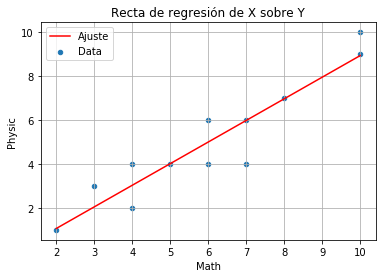

In [8]:
%matplotlib inline
dataFrame.plot(kind="scatter",x="Math", y="Physic", label="Data")
plt.plot(dataFrame.Math,m1*dataFrame.Math+(b1), label="Ajuste", color="red")
plt.title("Recta de regresión de X sobre Y")
plt.legend()
plt.grid()

**Dibujamos el scatter plot para la variable Y**

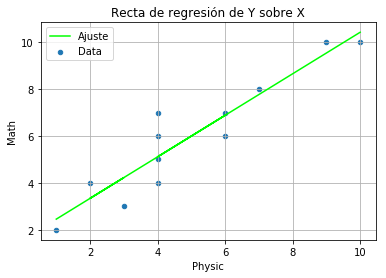

In [9]:
%matplotlib inline
dataFrame.plot(kind="scatter",x="Physic", y="Math", label="Data")
plt.plot(dataFrame.Physic,m2*dataFrame.Physic+(b2), label="Ajuste", color="lime")
plt.title("Recta de regresión de Y sobre X")
plt.legend()
plt.grid()

## Coeficiente de determinación

Una medida de cuán bueno es el modelo de regresión es el siguiente: &nbsp;

$$ R^2 = (r_{XY})^2 = (\frac{S_{XY}}{S_{X}S_{Y}})^2$$

Es el cuadrado del**coeficiente de correlación lineal de Pearson** &nbsp;
Si se esxpresa en % quiere decir que el modelo explica ese % de la variabliidad de la variable dependiente en función de l varibale independiente.&nbsp;
**Desamos que sea alta**.

**Hallamos el coeficiente de determinación**

In [10]:
R2 = (cov_xy/(math.sqrt(sx)*math.sqrt(sy)))**2
print("R^2 = {} %".format(R2*100))

R^2 = 87.51736111111103 %


El coeficiiente es alto, por lo tanto es un buen modelo.